## Assignment-3
### Name: Harshitha Anishetty
### StudenID: 8903318

**Assignment 3 CSCN8000 Artificial Intelligence Algorithms and Mathematics**

1.  Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop the other two features for simplicity.
   
    Figure out if any preprocessing such as scaling would help here
    
    Draw elbow plot and from that figure out optimal value of k
    
2.  Use the heart dataset from the Resources Folder or access it from https://www.kaggle.com/fedesoriano/heart-failure-prediction 
   
    Load heart disease dataset in pandas dataframe
   
    Remove outliers using Z score. Usual guideline is to remove anything that has Z score > 3 formula or Z score < -3
    
    Convert text columns to numbers using label encoding / one hot encoding
    
    Apply scaling
    
    Build a classification model using various methods (SVM, logistic regression, random forest) and check which model gives you the best accuracy
    
    Now use PCA to reduce dimensions, retrain your model and see its impact on your model in terms of accuracy. 
  



**Notes: This lab should be submitted as a notebook and an HTML. Follow https://docs.github.com/en/pages/quickstart.**

### Part - 1
#### Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop the other two features for simplicity.

#### Import Necessary Libraries

In [262]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from scipy.stats import zscore


#### Load the dataset and extract the features

In [263]:
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data = data[['petal length (cm)', 'petal width (cm)']]
data.head(10)

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
5,1.7,0.4
6,1.4,0.3
7,1.5,0.2
8,1.4,0.2
9,1.5,0.1


#### Preprocess the data

In [264]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

#### Determine the optimal number of clusters (elbow plot)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

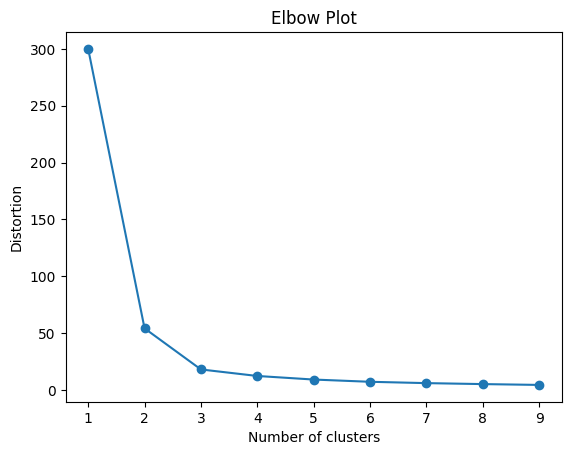

In [265]:
distortions = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_data)
    distortions.append(kmeans.inertia_)
plt.plot(K_range, distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Plot')
plt.show()

### The above elbow plot illustrates that, the number of optimum clusters = 3. Hence, the optimal value of k = 3

#### Based on the elbow plot, perform clustering clustering on k

In [266]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(scaled_data)
data['cluster'] = clusters
data

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


### Part - 2
#### Use the heart dataset from the Resources Folder or access it from https://www.kaggle.com/fedesoriano/heart-failure-prediction

#### Load heart disease dataset in pandas dataframe

In [267]:
# Load dataset
data = pd.read_csv('../../practical_labs/heart_failure_dataset.csv')
data.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [268]:


# Remove outliers using Z score
z_scores = zscore(data.select_dtypes(include=['float64', 'int64']))
data = data[(z_scores < 3).all(axis=1)]

# Convert text columns to numbers using label encoding / one hot encoding
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['ExerciseAngina'] = label_encoder.fit_transform(data['ExerciseAngina'])


# Use one-hot encoding for categorical columns
categorical_columns = ['ChestPainType', 'RestingECG', 'ST_Slope']
data = pd.get_dummies(
    data, columns=categorical_columns, drop_first=True)

data.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,True,False,False,True,False,False,True
1,49,0,160,180,0,156,0,1.0,1,False,True,False,True,False,True,False
2,37,1,130,283,0,98,0,0.0,0,True,False,False,False,True,False,True
3,48,0,138,214,0,108,1,1.5,1,False,False,False,True,False,True,False
4,54,1,150,195,0,122,0,0.0,0,False,True,False,True,False,False,True


In [269]:
# Split data into features (X) and target (y)
X = data.drop(columns=['HeartDisease'])
y = data['HeartDisease']

# Apply scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,-1.428963,0.514856,0.460891,0.852380,-0.550879,1.381913,-0.820652,-0.846763,2.067572,-0.535475,-0.229148,0.809349,-0.490627,-1.002220,1.138053
1,-0.475460,-1.942289,1.592573,-0.161329,-0.550879,0.752911,-0.820652,0.140799,-0.483659,1.867502,-0.229148,0.809349,-0.490627,0.997785,-0.878693
2,-1.746797,0.514856,-0.104950,0.796580,-0.550879,-1.527222,-0.820652,-0.846763,2.067572,-0.535475,-0.229148,-1.235561,2.038206,-1.002220,1.138053
3,-0.581404,-1.942289,0.347722,0.154874,-0.550879,-1.134095,1.218544,0.634579,-0.483659,-0.535475,-0.229148,0.809349,-0.490627,0.997785,-0.878693
4,0.054264,0.514856,1.026732,-0.021827,-0.550879,-0.583719,-0.820652,-0.846763,-0.483659,1.867502,-0.229148,0.809349,-0.490627,-1.002220,1.138053


#### Build and evaluate classification models

SVM: Accuracy = 0.8784530386740331
Logistic Regression: Accuracy = 0.850828729281768
Random Forest: Accuracy = 0.8729281767955801


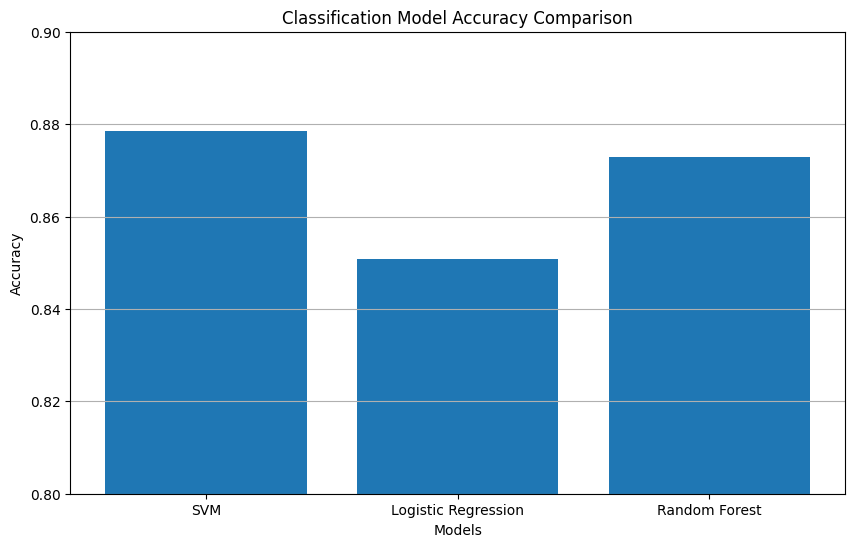

In [270]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

models = {
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier()
}
model_accuracies = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name}: Accuracy = {accuracy}')
    model_accuracies[f'{name}'] = accuracy



plt.figure(figsize=(10, 6))
plt.bar(model_accuracies.keys(), model_accuracies.values())
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Classification Model Accuracy Comparison')
plt.ylim(0.8, 0.9)
plt.grid(axis='y')
plt.show()


#### Use PCA for dimensionality reduction and retrain the models

SVM (with PCA): Accuracy = 0.8784530386740331
Logistic Regression (with PCA): Accuracy = 0.861878453038674
Random Forest (with PCA): Accuracy = 0.8342541436464088


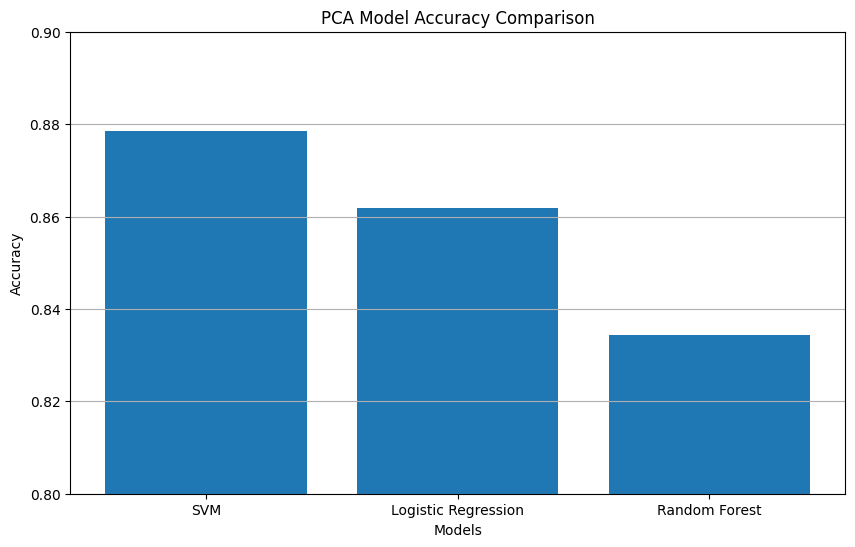

In [271]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.2, random_state=42)

model_accuracies_pca={}

for name, model in models.items():
    model.fit(X_train_pca, y_train_pca)
    y_pred_pca = model.predict(X_test_pca)
    accuracy_pca = accuracy_score(y_test_pca, y_pred_pca)
    print(f'{name} (with PCA): Accuracy = {accuracy_pca}')
    model_accuracies_pca[f'{name}'] = accuracy_pca

plt.figure(figsize=(10, 6))
plt.bar(model_accuracies_pca.keys(), model_accuracies_pca.values())
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('PCA Model Accuracy Comparison')
plt.ylim(0.8, 0.9)
plt.grid(axis='y')
plt.show()


#### CONCLUSION

* The application of PCA yielded diverse outcomes across distinct models. While Logistic Regression experienced modest improvements through dimensionality reduction, the performance of Random Forest was adversely affected. SVM, however, demonstrated consistent performance in both situations.

* It is crucial to emphasize that PCA primarily aims at reducing dimensions, which can contribute to expedited training durations and diminished overfitting. The influence on accuracy can vary according to the individual characteristics and connections present within the data.